# Лабораторна робота 2.

## Створення штучно синтезованих наборів даних

**Лабораторна робота виконується індивідуально. Використання запозиченого коду буде оцінюватись в 0 балів.**

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

**Завдання 1: Синтезувати набір даних, який складається з двох лінійно роздільних множин, що можуть бути використані для навчання моделей класифікації.**


**Роз"яснення до завдання 1:**

1. **Опис набору даних:**
   - Набір даних повинен містити дві класифікаційні мітки (клас 1 і клас 2).
   - Кожен об"єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Обидва класи мають бути лінійно роздільні, тобто можна знайти таку пряму, яка розділяє дані двох класів без помилок.
   - Дані повинні бути рівномірно розподілені по всьому простору, але з певним відхиленням для забезпечення реалістичності.
   - Можливі варіанти синтезу:
     - Використання нормального розподілу для генерації точок навколо центроїдів двох класів.
     - Додавання невеликого шуму до кожного класу для забезпечення варіативності даних.

3. **Параметри набору даних:**
   - Кількість точок (об"єктів) у наборі даних: **500** для кожного класу (всього **1000**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y)$ і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **1000** рядків з трьома колонками: $x$, $y$, $class$.
   - Перевірка лінійної роздільності: Побудуйте графік з нанесеними точками і покажіть лінію, яка розділяє два класи.

5. **Додаткові умови:**
- Зробіть аналіз набору даних, побудувавши гістограми розподілу даних для кожного класу окремо.
- Опишіть підходи, які використовувалися для створення набору даних.

image.png

In [85]:
covariance_matrix = [[1.5, 0.5], [0.5, 1.5]]
n = 500

In [86]:
first_class_points = np.random.multivariate_normal([2, 2], covariance_matrix, n)
second_class_points = np.random.multivariate_normal([8, 8], covariance_matrix, n)

first_class_labels = np.repeat(1, n)
second_class_labels = np.repeat(2, n)

In [87]:
dataset = pd.DataFrame([*first_class_points, *second_class_points], columns=["x", "y"])
dataset["class"] = [*first_class_labels, *second_class_labels]

dataset.head()

,x,y,class
0,0.704023,0.020260,1
1,2.897694,1.691894,1
2,3.082691,4.391485,1
3,4.457473,1.078885,1
4,2.484003,0.736034,1


In [88]:
dataset.to_csv("dataset_1.csv", encoding="utf-8", index=False)

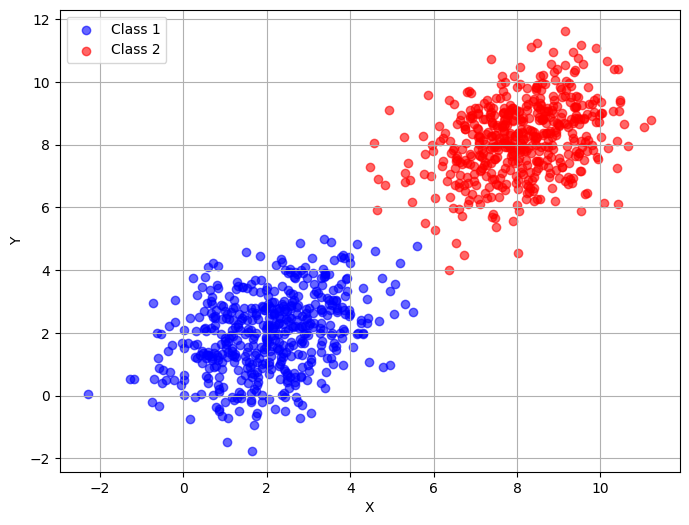

In [89]:
plt.figure(figsize=(8, 6))

plt.scatter(
    dataset[dataset["class"] == 1]["x"], 
    dataset[dataset["class"] == 1]["y"], 
    color="blue", 
    label="Class 1", 
    alpha=0.6
)

plt.scatter(
    dataset[dataset["class"] == 2]["x"], 
    dataset[dataset["class"] == 2]["y"], 
    color="red", 
    label="Class 2", 
    alpha=0.6
)

plt.xlabel("X")
plt.ylabel("Y")
plt.legend()

plt.grid(True)
plt.show()

(array([ 1.,  2.,  1.,  3.,  7., 16., 20., 38., 38., 56., 63., 57., 69.,
        58., 27., 20., 11.,  6.,  6.,  1.]),
 array([ 3.98967054,  4.3717493 ,  4.75382807,  5.13590683,  5.51798559,
         5.90006436,  6.28214312,  6.66422188,  7.04630064,  7.42837941,
         7.81045817,  8.19253693,  8.57461569,  8.95669446,  9.33877322,
         9.72085198, 10.10293075, 10.48500951, 10.86708827, 11.24916703,
        11.6312458 ]),
 <BarContainer object of 20 artists>)

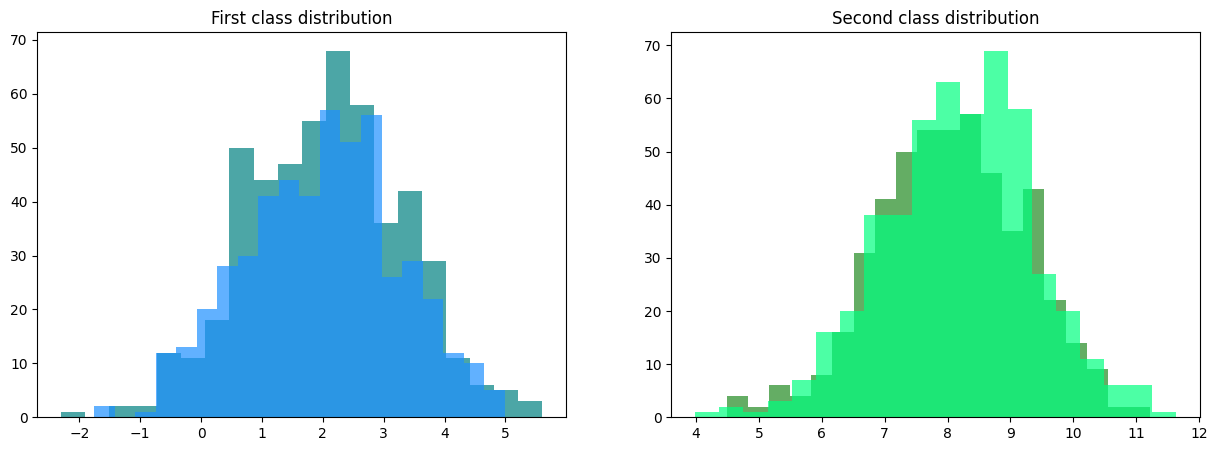

In [90]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].set_title("First class distribution")
ax[0].hist(
    first_class_points[:, 0], 
    bins=20, 
    alpha=0.7, 
    color="teal",
)
ax[0].hist(
    first_class_points[:, 1], 
    bins=20, 
    alpha=0.7, 
    color="dodgerblue",
)

ax[1].set_title("Second class distribution")
ax[1].hist(
    second_class_points[:, 0], 
    bins=20, 
    alpha=0.7, 
    color="forestgreen",
)
ax[1].hist(
    second_class_points[:, 1], 
    bins=20, 
    alpha=0.7, 
    color="springgreen",
)


Тут генерується набір даних за допомогою функції багатовимірного нормального розподілу `multivariate_normal` у якій було вказано середні значення та коваріаційну матрицю таким чином щоб вихідний датасет був лінійно роздільний на 2 класи в кожному з яких по 500 точок.

**Завдання 2: Синтезувати набір даних, який складається з трьох множин (класів), що мають часткове перекриття, для використання в задачах класифікації та аналізу даних.**

**Роз"яснення до завдання 2:**

1. **Опис набору даних:**
   - Набір даних повинен містити три класифікаційні мітки (клас 1, клас 2, клас 3).
   - Кожен об"єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Дані мають утворювати три множини, кожна з яких розподілена навколо свого центру, але з перекриттям з іншими множинами.
   - Кожен клас повинен мати певну ступінь перекриття з іншими класами, що призводить до часткової змішуваності точок з різними мітками.
   - Можливі варіанти синтезу:
     - Використання нормального розподілу для генерації точок навколо центроїдів кожного класу.
     - Додавання більшого шуму або кореляції між точками для збільшення ступеня перекриття.

3. **Параметри набору даних:**
   - Кількість точок (об"єктів) у наборі даних: **300** для кожного класу (всього **900**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y)$ і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **900** рядків з трьома колонками: $x$, $y$, $class$.
   - Побудуйте графік з нанесеними точками для всіх трьох класів, щоб візуалізувати перекриття множин.
   - Перевірте, чи дійсно дані утворюють перекриття між класами, показавши частку точок, які належать до зон перекриття.

5. **Додаткові умови:**
   - Побудуйте кореляційні графіки та гістограми розподілу для кожного класу.
   - Опишіть підходи, які використовувалися для створення набору даних, і обґрунтуйте вибір параметрів.

image.png

In [91]:
covariance_matrix = [[1.5, 0.7], [0.7, 1.5]]
n = 300

In [92]:
first_class_points = np.random.multivariate_normal([4, 2], covariance_matrix, n)
second_class_points = np.random.multivariate_normal([8, 7], covariance_matrix, n)
third_class_points = np.random.multivariate_normal([10, 4], covariance_matrix, n)

first_class_labels = np.repeat(1, n)
second_class_labels = np.repeat(2, n)
third_class_labels = np.repeat(3, n)

In [93]:
dataset = pd.DataFrame([*first_class_points, *second_class_points, *third_class_points], columns=["x", "y"])
dataset["class"] = [*first_class_labels, *second_class_labels, *third_class_labels]

dataset.head()

,x,y,class
0,5.024911,2.428177,1
1,2.228902,2.332802,1
2,4.631129,2.376716,1
3,4.469195,0.911296,1
4,4.552236,3.187110,1


In [94]:
dataset.to_csv("dataset_2.csv", encoding="utf-8", index=False)

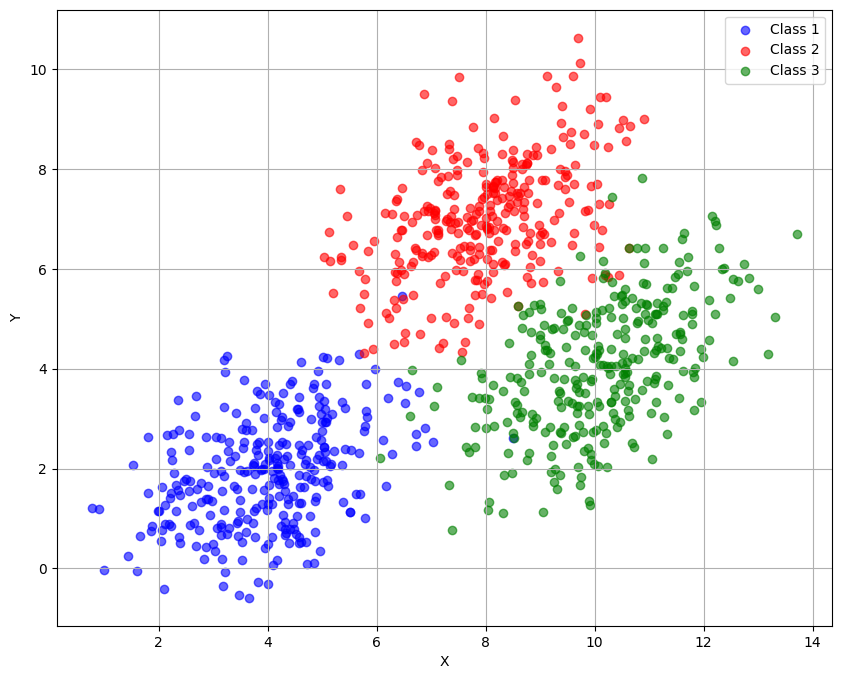

In [95]:
plt.figure(figsize=(10, 8))

plt.scatter(
    dataset[dataset["class"] == 1]["x"], 
    dataset[dataset["class"] == 1]["y"], 
    color="blue", 
    label="Class 1", 
    alpha=0.6
)

plt.scatter(
    dataset[dataset["class"] == 2]["x"], 
    dataset[dataset["class"] == 2]["y"], 
    color="red", 
    label="Class 2", 
    alpha=0.6
)

plt.scatter(
    dataset[dataset["class"] == 3]["x"], 
    dataset[dataset["class"] == 3]["y"], 
    color="green", 
    label="Class 3", 
    alpha=0.6
)

plt.xlabel("X")
plt.ylabel("Y")
plt.legend()

plt.grid(True)
plt.show()

(array([ 2.,  5.,  4., 12., 16., 21., 20., 31., 31., 27., 28., 25., 33.,
        13., 13.,  6.,  8.,  3.,  1.,  1.]),
 array([0.76593004, 1.11812686, 1.47032369, 1.82252051, 2.17471734,
        2.52691416, 2.87911099, 3.23130781, 3.58350464, 3.93570146,
        4.28789829, 4.64009511, 4.99229194, 5.34448876, 5.69668559,
        6.04888241, 6.40107924, 6.75327606, 7.10547289, 7.45766971,
        7.80986653]),
 <BarContainer object of 20 artists>)

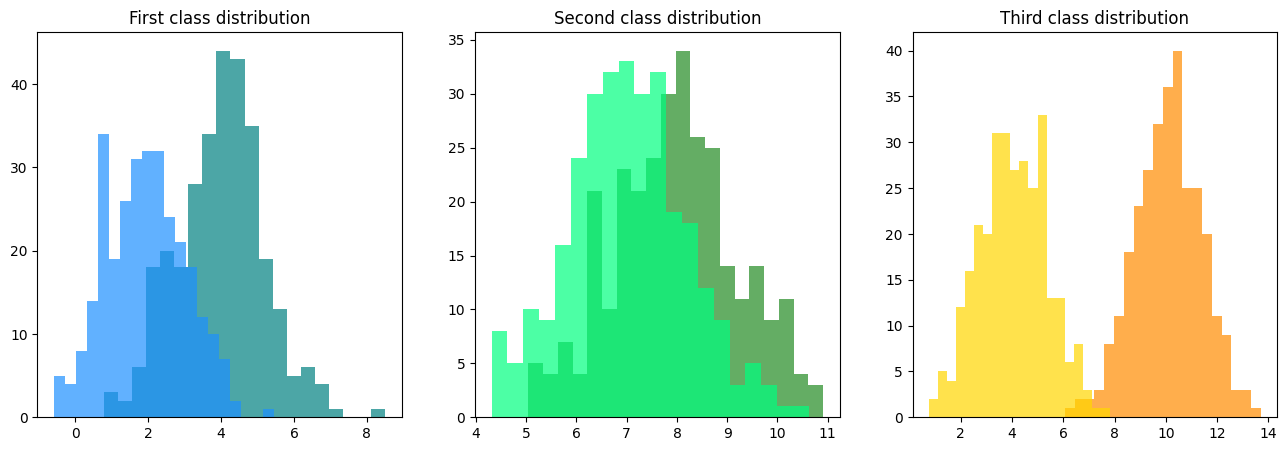

In [96]:
fig, ax = plt.subplots(1, 3, figsize=(16, 5))

ax[0].set_title("First class distribution")
ax[0].hist(
    first_class_points[:, 0], 
    bins=20, 
    alpha=0.7, 
    color="teal",
)
ax[0].hist(
    first_class_points[:, 1], 
    bins=20, 
    alpha=0.7, 
    color="dodgerblue",
)

ax[1].set_title("Second class distribution")
ax[1].hist(
    second_class_points[:, 0], 
    bins=20, 
    alpha=0.7, 
    color="forestgreen",
)
ax[1].hist(
    second_class_points[:, 1], 
    bins=20, 
    alpha=0.7, 
    color="springgreen",
)

ax[2].set_title("Third class distribution")
ax[2].hist(
    third_class_points[:, 0], 
    bins=20, 
    alpha=0.7, 
    color="darkorange",
)
ax[2].hist(
    third_class_points[:, 1], 
    bins=20, 
    alpha=0.7, 
    color="gold",
)


У цьому наборі даних використовується інденитичний підхід до генерації датасету з використанням функції багатовимірного нормального розподілу `multivariate_normal` у якій я вказав трошки інші параметри для генерації орієнтуючись на точкову діаграму для того щоб наші 3 класи в деяких місцях перекривали один одного

**Завдання 3: Синтезувати набір даних, який складається з двох множин у формі "тор в торі", де одна множина має форму внутрішнього тора, а інша — зовнішнього тора.**

**Роз"яснення до завдання 3:**

1. **Опис набору даних:**
   - Набір даних повинен містити дві класифікаційні мітки (клас 1 і клас 2).
   - Кожен об"єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Дані повинні утворювати дві множини у формі тора: одна множина повинна бути розташована всередині іншої (тобто, "тор в торі").
   - Внутрішній тор (клас 1) повинен мати менший радіус і ширину, ніж зовнішній тор (клас 2).
   - Розподіл точок повинен бути рівномірним вздовж кожного тора з додаванням невеликого шуму для забезпечення варіативності.

3. **Параметри набору даних:**
   - Кількість точок (об"єктів) у наборі даних: **500** для кожного класу (всього **1000**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y) $і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **1000** рядків з трьома колонками: $x$, $y$, $class$.
   - Побудуйте графік з нанесеними точками для обох класів, щоб візуалізувати форму "тор в торі".
   - Перевірте розподіл точок уздовж кожного тора, побудувавши радіальні гістограми для кожного класу.

5. **Додаткові умови:**
   - Побудуйте окремі графіки, які демонструють розподіл даних для кожного тора окремо.
   - Опишіть процес генерації даних та поясніть вибір параметрів для кожного тора.

image.png

In [97]:
n = 500

inner_radius = 5
inner_width = 1

outer_radius = 10
outer_width = 1.5

In [98]:
theta_inner = 2 * np.pi * np.random.rand(n)
radius_inner = inner_radius + inner_width * (np.random.rand(n) - 0.5)

x_inner = radius_inner * np.cos(theta_inner)
y_inner = radius_inner * np.sin(theta_inner)
c_inner = np.repeat(1, n)

In [99]:
theta_outer = 2 * np.pi * np.random.rand(n)
radius_outer = outer_radius + outer_width * (np.random.rand(n) - 0.5)

x_outer = radius_outer * np.cos(theta_outer)
y_outer = radius_outer * np.sin(theta_outer)
c_outer = np.repeat(2, n)

In [100]:
dataset = pd.DataFrame({
    "x": [*x_inner, *x_outer],
    "y": [*y_inner, *y_outer],
    "class": [*c_inner, *c_outer],
})

dataset.head()


,x,y,class
0,4.204114,-2.398182,1
1,-4.109263,2.576153,1
2,1.115446,4.804043,1
3,5.244765,-1.453996,1
4,-4.808241,0.492058,1


In [101]:
dataset.to_csv("dataset_3.csv", encoding="utf-8", index=False)

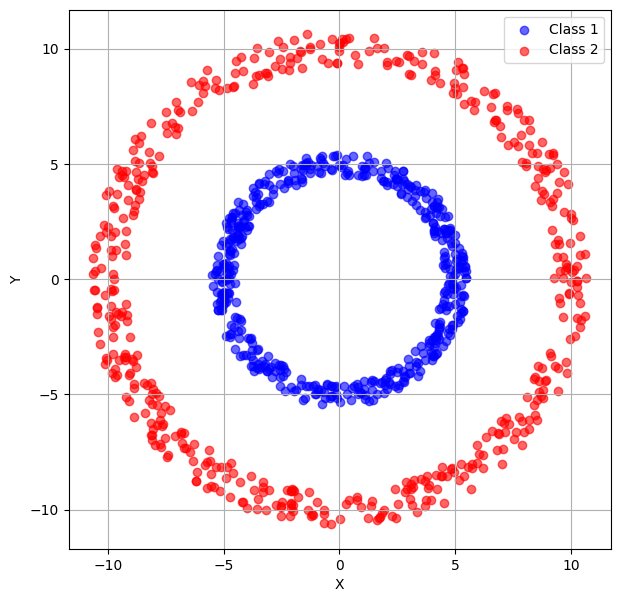

In [102]:
plt.figure(figsize=(7, 7))

plt.scatter(
    dataset[dataset["class"] == 1]["x"], 
    dataset[dataset["class"] == 1]["y"], 
    color="blue", 
    label="Class 1", 
    alpha=0.6
)

plt.scatter(
    dataset[dataset["class"] == 2]["x"], 
    dataset[dataset["class"] == 2]["y"], 
    color="red", 
    label="Class 2", 
    alpha=0.6
)

plt.xlabel("X")
plt.ylabel("Y")
plt.legend()

plt.grid(True)
plt.show()

Тут генерується набір даних у якому є 2 класи кожен з яких розділений точками у формі торуса з різним радіусом та шириною. На точковій діаграмі можна побачити що параметри торусів підібрані таким чином щоб торус який відноситься до 1 класу був всередині 2 класу 

**Завдання 4: Синтезувати набір даних, який складається з двох множин, що утворюють подвійну спіраль, де одна спіраль огортає іншу.**

**Роз"яснення до завдання 4:**

1. **Опис набору даних:**
   - Набір даних повинен містити дві класифікаційні мітки (клас 1 і клас 2).
   - Кожен об"єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Дані повинні утворювати дві спіралі, закручені одна в іншу, так щоб кожна спіраль відповідала одному з класів.
   - Спіралі повинні мати протилежні напрямки закручування (одна за годинниковою стрілкою, інша — проти).
   - Кожна спіраль повинна бути рівномірно заповнена точками з невеликим додаванням шуму для варіативності даних.

3. **Параметри набору даних:**
   - Кількість точок (об"єктів) у наборі даних: **500** для кожного класу (всього **1000**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y)$ і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **1000** рядків з трьома колонками: $x$, $y$, $class$.
   - Побудуйте графік з нанесеними точками для обох спіралей, щоб візуалізувати структуру "спіраль у спіралі".
   - Проаналізуйте відмінності у розподілі точок для обох класів та оцініть складність їх розділення.

5. **Додаткові умови:**
   - Створіть окремі графіки, що показують як закручується кожна спіраль.
   - Опишіть процес генерації даних, включаючи параметри, що використовувалися для визначення форми спіралей.

image.png

In [103]:
n = 500
noise = 0.2
turns = 3

In [104]:
theta = np.linspace(0, turns * 2 * np.pi, n)

x_1 = theta * np.cos(theta) + np.random.normal(0, noise, n)
y_1 = theta * np.sin(theta) + np.random.normal(0, noise, n)
c_1 = np.repeat(1, n)

x_2 = theta * np.cos(theta + np.pi) + np.random.normal(0, noise, n)
y_2 = theta * np.sin(theta + np.pi) + np.random.normal(0, noise, n)
c_2 = np.repeat(2, n)

In [105]:
dataset = pd.DataFrame({
    "x": [*x_1, *x_2],
    "y": [*y_1, *y_2],
    "class": [*c_1, *c_2],
})

dataset.head()

,x,y,class
0,0.155454,-0.000475,1
1,0.002420,-0.004910,1
2,0.071675,-0.393426,1
3,0.180958,0.273307,1
4,0.280618,-0.315559,1


In [106]:
dataset.to_csv("dataset_4.csv", encoding="utf-8", index=False)

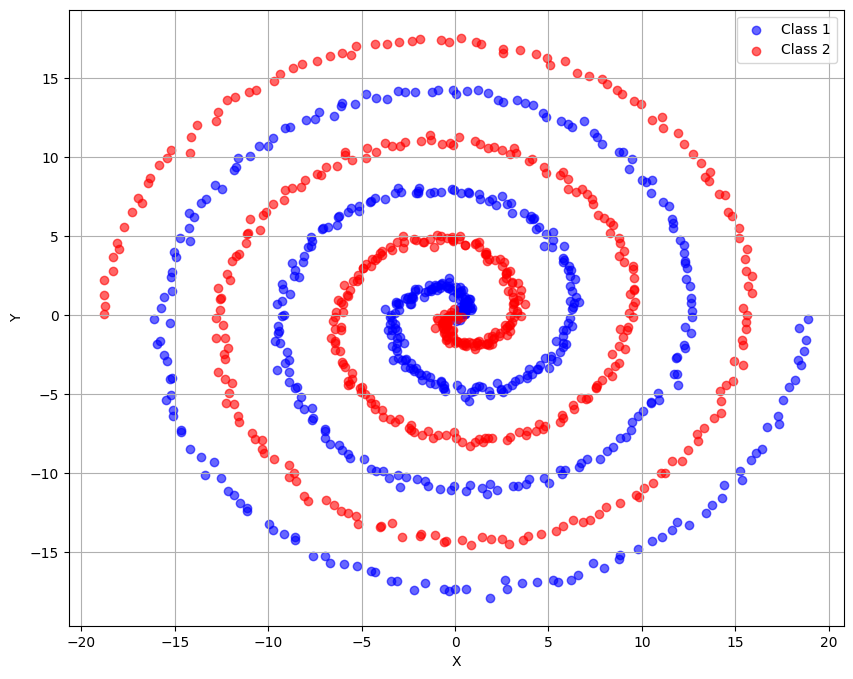

In [107]:
plt.figure(figsize=(10, 8))

plt.scatter(
    dataset[dataset["class"] == 1]["x"], 
    dataset[dataset["class"] == 1]["y"], 
    color="blue", 
    label="Class 1", 
    alpha=0.6
)

plt.scatter(
    dataset[dataset["class"] == 2]["x"], 
    dataset[dataset["class"] == 2]["y"], 
    color="red", 
    label="Class 2", 
    alpha=0.6
)

plt.xlabel("X")
plt.ylabel("Y")
plt.legend()

plt.grid(True)
plt.show()

Тут генеруються 2 спіралі де одна огортає іншу спіраль. Точки для кожної спіралі генеруються з параметру `theta` який по суті представляє рівномірно розподілену послідовність яка використовується в функціях `sin`, `cos` для генерації координат точки також тут використовується накладання шуму на кінцеву координату для більшої варіативності кінцевого результату.

**Завдання 5: Синтезувати кілька наборів даних, що описують траєкторії системи Лоренца з різними параметрами, дослідити вплив параметрів на динаміку системи та візуалізувати результати.**


### 5.1: Теоретичне підґрунтя

**Опис системи Лоренца:**
Система Лоренца — це набір трьох нелінійних диференціальних рівнянь, що описують динаміку тривимірної системи з хаотичною поведінкою. Вона визначається такими рівняннями:

$$
\frac{dx}{dt} = \sigma (y - x)
$$

$$
\frac{dy}{dt} = x (\rho - z) - y
$$

$$
\frac{dz}{dt} = xy - \beta z
$$

Де:
- $(x, y, z)$ — змінні стану системи.
- $\sigma$ — параметр, що відповідає за швидкість зміни (часто називають "параметр Прандтля").
- $\rho$ — параметр, що відповідає за різницю температур у системі (відповідає за інтенсивність конвекції).
- $\beta$  — параметр, що відповідає за співвідношення розмірів.

**Роз"яснення до завдання:**
- Згенерувати дані для системи Лоренца за допомогою різних значень параметрів $\sigma$, $\rho$ та $\beta$.
- Проаналізувати вплив зміни параметрів на траєкторії системи.
- Візуалізувати результати в тривимірному просторі для кожного набору даних.

### 5.2: Генерація та візуалізація набору даних

**Що треба зробити:**

1. **Генерація даних:**
   - Вибрати декілька різних комбінацій параметрів $\sigma$, $\rho$ та $\beta$.
   - Використовуючи числовий метод (наприклад, метод Рунге-Кутти 4-го порядку), згенерувати траєкторії системи Лоренца для кожного набору параметрів.

2. **Візуалізація:**
   - Для кожного набору параметрів побудувати тривимірні графіки траєкторій.
   - Відобразити траєкторії в просторі $(x, y, z)$.

3. **Аналіз:**
   - Порівняти результати для різних наборів параметрів.
   - Описати, як зміна кожного з параметрів впливає на поведінку системи (наприклад, перехід від стабільного до хаотичного режиму).

**Очікуваний результат:**
- Кілька наборів даних, що описують траєкторії системи Лоренца з різними параметрами (мінімум 3).
- Візуалізації цих траєкторій у тривимірному просторі.
- Аналіз і опис впливу параметрів на динаміку системи.

image.png

In [108]:
def lorenz_system_func(t, state, sigma, rho, beta):
    x, y, z = state
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

In [109]:
params = [
    (10, 28, 8/3),
    (14, 46, 4),
    (16, 16, 0.5)
]

initial_state = [1.0, 1.0, 1.0]

t_span = (0, 50)
t_eval = np.linspace(t_span[0], t_span[1], 10000)

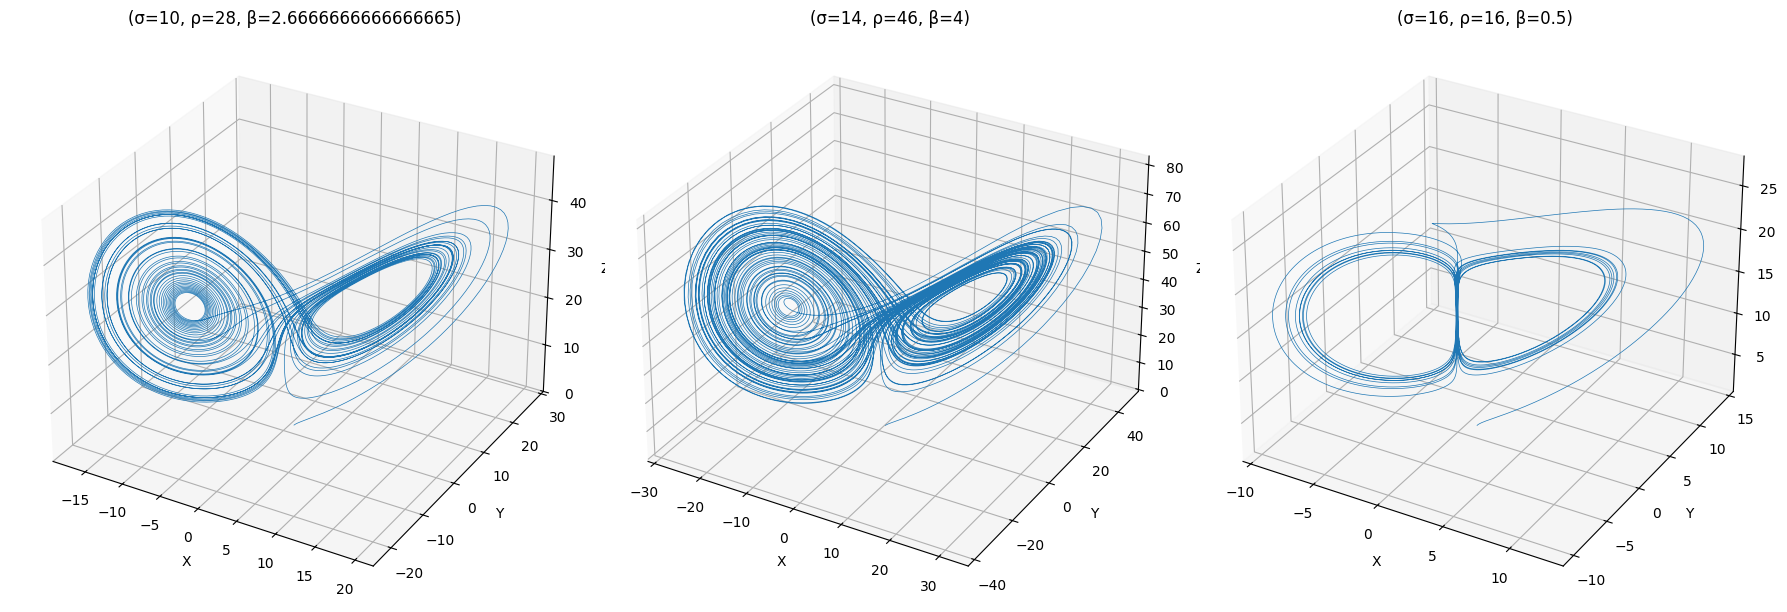

In [110]:
fig = plt.figure(figsize=(18, 6))

for i, v in enumerate(params):
    sol = solve_ivp(
        fun=lorenz_system_func, 
        t_span=t_span, 
        y0=initial_state, 
        t_eval=t_eval,
        args=v
    )

    ax = fig.add_subplot(1, 3, i + 1, projection="3d")
    ax.plot(sol.y[0], sol.y[1], sol.y[2], lw=0.5)
    ax.set_title(f'(σ={v[0]}, ρ={v[1]}, β={v[2]})')
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")

plt.tight_layout()
plt.show()

Тут генерується датасет на основі рівнянь системи Лоренца. Параметри `sigma`, `rho` і `beta` впливають на динаміку та поведінку системи Лоренца збільшення.
- `sigma` (число Прандтля) підвищує чутливість до початкових умов призводячи до  хаотичніших траєкторій а нижчі значення показують стабільнішу поведінку. 
- `rho` (інтенсивність конвекції) відповідає за перехід від періодичної до хаотичної динаміки якщо збільшувати цей параметр траєкторії системи розтягуються вздовж осі `z` що збільшує хаос. 
- `beta` (співвідношення сторін) впливає на стабільність системи в напрямку `z` нижчі значення ускладнюють траєкторії роблячи їх більш витягнутими а вищі значення стабілізують систему. \
\
Тому зміна будь якого з цих параметрів може кардинально змінити характер поведінки системи від стабільних до повністю хаотичних режимів.